In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
df = pd.read_csv("train.csv")

In [37]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [39]:
df["PoolQC"] = df["PoolQC"].fillna(0)
df["ExterQual"] = df["ExterQual"].fillna(0)
df["ExterCond"] = df["ExterCond"].fillna(0)
df["BsmtQual"] = df["BsmtQual"].fillna(0)
df["BsmtCond"] = df["BsmtCond"].fillna(0)
df["HeatingQC"] = df["HeatingQC"].fillna(0)
df["KitchenQual"] = df["KitchenQual"].fillna(0)
df["FireplaceQu"] = df["FireplaceQu"].fillna(0)
df["GarageQual"] = df["GarageQual"].fillna(0)
df["GarageCond"] = df["GarageCond"].fillna(0)

In [40]:
df = df.replace("Ex", 5)
df = df.replace("Gd", 4)
df = df.replace("TA", 3)
df = df.replace("Fa", 2)
df = df.replace("Po", 1)

In [41]:
df.dtypes.value_counts()

int64      45
object     33
float64     3
dtype: int64

In [42]:
df["CentralAir"] = df["CentralAir"].replace("Y", 1)
df["CentralAir"] = df["CentralAir"].replace("N", 0)
df["CentralAir"].value_counts() #YES or No variable

1    1365
0      95
Name: CentralAir, dtype: int64

In [45]:
df["BsmtExposure"].value_counts()

No    953
Av    221
4     134
Mn    114
Name: BsmtExposure, dtype: int64

In [46]:
df["BsmtExposure"] = df["BsmtExposure"].replace(4, 3)
df["BsmtExposure"] = df["BsmtExposure"].replace("Av", 2)
df["BsmtExposure"] = df["BsmtExposure"].replace("No", 0)
df["BsmtExposure"] = df["BsmtExposure"].replace("Mn", 1)
df["BsmtExposure"] = df["BsmtExposure"].fillna(0)

In [47]:
df["BsmtExposure"].value_counts()

0.0    991
2.0    221
3.0    134
1.0    114
Name: BsmtExposure, dtype: int64

In [48]:
df["PavedDrive"] = df["PavedDrive"].replace("Y", 1)
df["PavedDrive"] = df["PavedDrive"].replace("N", 0)
df["PavedDrive"] = df["PavedDrive"].replace("P", 0.5)

In [49]:
df["PavedDrive"].value_counts()

1.0    1340
0.0      90
0.5      30
Name: PavedDrive, dtype: int64

In [50]:
df.dtypes.value_counts()

int64      46
object     30
float64     5
dtype: int64

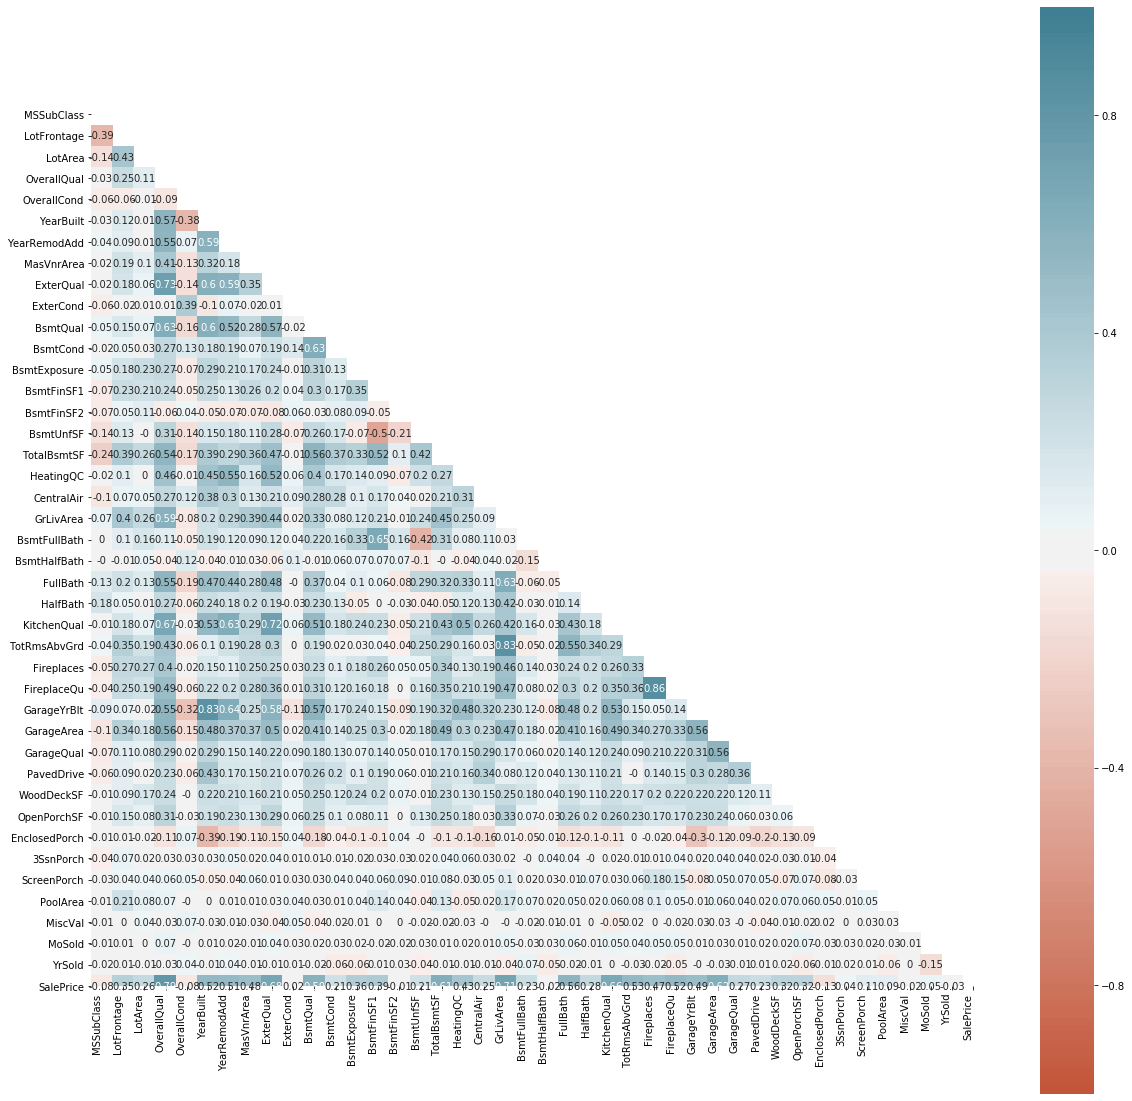

In [55]:
plt.figure(figsize=(20,20))

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True


ax = sns.heatmap(
    round(df.corr(), 2), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [54]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 

In [53]:
df.drop("Id", axis=1, inplace = True) #first of all we drop because it was assigned randomly and brings no value
df.drop("GarageCars", axis=1, inplace = True) # we drop GarageCars because it is logical that number of cars depends on the garage area
df.drop("PoolQC", axis=1, inplace = True)
df.drop("MiscFeature", axis = 1, inplace = True)
df.drop("BedroomAbvGr", axis = 1, inplace = True)
df.drop("1stFlrSF", axis = 1, inplace = True)
df.drop("2ndFlrSF", axis = 1, inplace = True)
df.drop("GarageCond", axis = 1, inplace = True)
df.drop("LowQualFinSF", axis = 1, inplace = True)
df.drop("KitchenAbvGr", axis = 1, inplace = True) #included in TotalRoomsAboveGround
df.drop("Utilities", axis = 1, inplace = True)


PCE for: [Garage Year Built, Garage Area, Garage Quality], [Fireplaces, FireplaceQu], [BsmtQual, BsmtCond], [ExterCond, ExterQual] + [BsmtFinfSF1,BsmtFinfSF2, BsmtUnfSF, totalbsmtsf] + porch

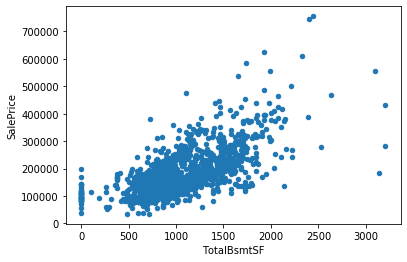

In [28]:
df.plot.scatter(x="TotalBsmtSF", y='SalePrice') #Total square feet of basement area

In [27]:
df = df[df['TotalBsmtSF'] < 4000]

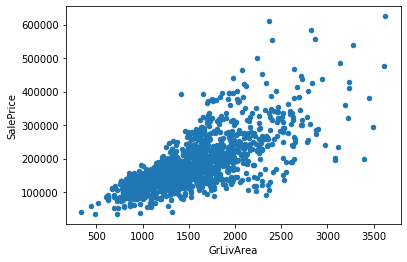

In [31]:
df.plot.scatter(x="GrLivArea", y='SalePrice')

In [30]:
df = df[df['GrLivArea'] < 4000]

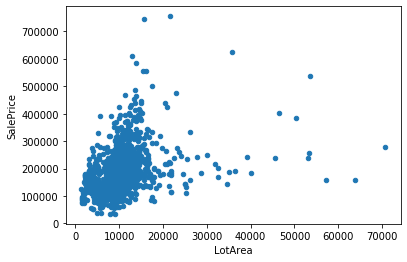

In [58]:
df.plot.scatter(x='LotArea', y='SalePrice')

In [57]:
df = df[df['LotArea'] < 80000]

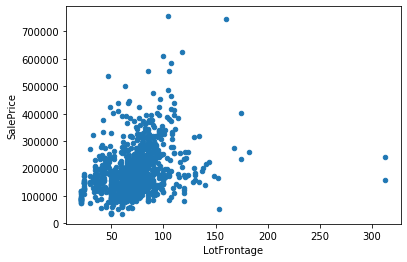

In [59]:
df.plot.scatter(x='LotFrontage', y='SalePrice')

In [60]:
df = df[df['LotFrontage'] < 200]

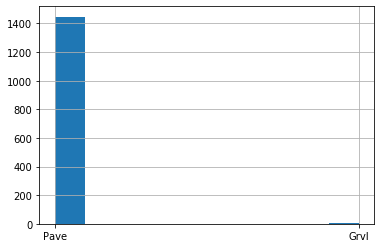

In [36]:
df['Street'].hist() #should we drop it?

<Figure size 1440x1440 with 0 Axes>

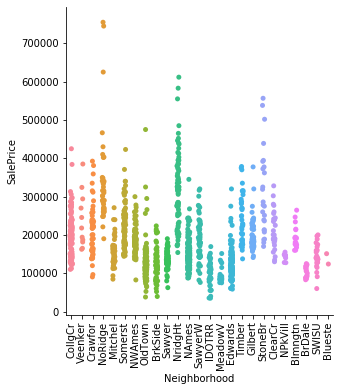

In [22]:
#plt.figure(figsize=(20,20))
aх = sns.catplot(x="Neighborhood", y="SalePrice", hue="Neighborhood", data=df )
aх.set_xticklabels(rotation=90)

In [61]:
homedata_onehot = pd.get_dummies(df, columns=['Foundation', 'GarageFinish', 'LandSlope', 'LotConfig', 'GarageQual',
 'LandContour', 'GarageType', 'LotShape', 'Alley',
 'Street', 'Fence', 'MSZoning', 'SaleType', 'FireplaceQu', 'Condition1', 'Functional', 'BsmtQual',
 'BsmtCond', 'BsmtFinType1', 'ExterQual', 'BsmtFinType2',
 'MasVnrType', 'Exterior2nd', 'Heating', 'Neighborhood', 'SaleCondition',
 'Electrical', 'Exterior1st', 'RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType',
 'Condition2', 'KitchenQual', 'ExterCond', 'CentralAir', 'HeatingQC'])

In [62]:
homedata_onehot.dtypes.value_counts()

uint8      228
int64       28
float64      5
dtype: int64

In [63]:
homedata_onehot.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinSF1,...,ExterCond_3,ExterCond_4,ExterCond_5,CentralAir_0,CentralAir_1,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5
0,60,65.0,8450,7,5,2003,2003,196.0,0.0,706,...,1,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,3.0,978,...,1,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,1.0,486,...,1,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,0.0,216,...,1,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,2.0,655,...,1,0,0,0,1,0,0,0,0,1


In [64]:
NA = pd.DataFrame(columns=['Column',
                  'perc_NA'])
for column in homedata_onehot.columns:
    NA = NA.append({'Column' : column, 'perc_NA' : sum(homedata_onehot[column].isna())/len(homedata_onehot)}, ignore_index=True)

In [65]:
NA.sort_values('perc_NA', ascending=False)

,Column,perc_NA
20,GarageYrBlt,0.061770
7,MasVnrArea,0.005008
0,MSSubClass,0.000000
172,Neighborhood_Gilbert,0.000000
177,Neighborhood_NPkVill,0.000000
...,...,...
93,FireplaceQu_1,0.000000
94,FireplaceQu_2,0.000000
95,FireplaceQu_3,0.000000
96,FireplaceQu_4,0.000000


In [66]:
#homedata_onehot['LotFrontage'].value_counts()
print(sum(homedata_onehot['LotFrontage'].isna()))
homedata_onehot['LotFrontage'].mean()

0


69.57762938230384

In [67]:
homedata_onehot['LotFrontage'] = homedata_onehot['LotFrontage'].fillna(70.04995836802665)
print(sum(homedata_onehot['LotFrontage'].isna()))
homedata_onehot['LotFrontage'].mean()

0


69.57762938230384

In [68]:
#homedata_onehot['GarageYrBlt'].value_counts()
print(sum(homedata_onehot['GarageYrBlt'].isna()))
#homedata_onehot['GarageYrBlt'].mean()

74


In [69]:
same_count=0
diff_count=0
total_diff = 0
for i, x in zip(homedata_onehot['YearBuilt'],homedata_onehot['GarageYrBlt']):
    if np.isnan(x):
        continue
    else:
        if i == x:
            same_count+=1
        else:
            diff_count+=1
            total_diff= total_diff+(x-i)
        
print('same count:', same_count)
print('diff_count:', diff_count)
print('avg diff:', total_diff/diff_count)
print(same_count/(same_count+diff_count))
print(1-(same_count/(same_count+diff_count)))
print(81*0.79)
print(81*0.21)


same count: 873
diff_count: 251
avg diff: 27.40239043824701
0.7766903914590747
0.2233096085409253
63.99
17.009999999999998


In [70]:
homedata_onehot['GarageYrBlt'] = homedata_onehot['YearBuilt']

In [71]:
print(sum(homedata_onehot['MasVnrArea'].isna()))
homedata_onehot['MasVnrArea'] = homedata_onehot['MasVnrArea'].fillna(0)

6


In [72]:
NA = pd.DataFrame(columns=['Column',
                  'perc_NA'])
for column in homedata_onehot.columns:
    NA = NA.append({'Column' : column, 'perc_NA' : sum(homedata_onehot[column].isna())/len(homedata_onehot)}, ignore_index=True)
NA.sort_values('perc_NA', ascending=False)

,Column,perc_NA
0,MSSubClass,0.0
164,Neighborhood_Blmngtn,0.0
166,Neighborhood_BrDale,0.0
167,Neighborhood_BrkSide,0.0
168,Neighborhood_ClearCr,0.0
...,...,...
92,FireplaceQu_0,0.0
93,FireplaceQu_1,0.0
94,FireplaceQu_2,0.0
95,FireplaceQu_3,0.0


In [25]:
#print(homedata_onehot['LotArea'][762])
#homedata_onehot['LotArea'].describe()

In [26]:
#homedata_onehot['SalePrice'].head()
#homedata_onehot['LotArea'] = np.log(homedata_onehot['LotArea'])
#print(sum(homedata_onehot['LotArea'].isna()))

In [27]:
#homedata_onehot['LotArea'].describe()

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(homedata_onehot.drop(['SalePrice'], axis=1), homedata_onehot['SalePrice'], train_size=0.8, random_state=0)
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))


958
958
240
240


In [74]:
y_train = np.log(y_train)

In [75]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

linear = linear_model.LinearRegression().fit(X_train, y_train)
ridge = linear_model.Ridge(alpha=50).fit(X_train, y_train)
lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

linear_pred = linear.predict(X_val)
ridge_pred = ridge.predict(X_val)
lasso_pred = lasso.predict(X_val)

linear_pred = np.exp(linear_pred)
ridge_pred = np.exp(ridge_pred)
lasso_pred = np.exp(lasso_pred)


MAE_linear_pred = mean_absolute_error(y_val, linear_pred)
print('MAE linear pred:',MAE_linear_pred)

MAE_ridge_pred = mean_absolute_error(y_val, ridge_pred)
print('MAE ridge pred:',MAE_ridge_pred)

MAE_lasso_pred = mean_absolute_error(y_val, lasso_pred)
print('MAE lasso pred:',MAE_lasso_pred)
print('RMSLE', np.sqrt(mean_squared_log_error( y_val, ridge_pred )))
## before feature selection around 23000

C:\Users\mrsta\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#rf = RandomForestClassifier(n_estimators=250, max_depth=20, random_state=0).fit(X_train, y_train)

#y_pred = rf.predict(X_val)

#y_pred = np.exp(y_pred)

#MSE_RF_pred = mean_squared_error(y_val, y_pred)
#MAE_RF_pred = mean_absolute_error(y_val, y_pred)
#print('RMSE RF pred:', MSE_RF_pred**(1/2.0))
#print('MAE RF pred:', MAE_RF_pred)


In [32]:
from sklearn.svm import SVC

#svm_1 = SVC(kernel='poly', degree=1, gamma='auto', random_state=0).fit(X_train, y_train)

#svm1_pred = svm_1.predict(X_val)

#svm1_pred= np.exp(sv1_pred)

#MSE_svm1_pred = mean_squared_error(y_val, svm1_pred)
#MAE_svm1_pred = mean_absolute_error(y_val, svm1_pred)
#print('RMSE RF pred:', MSE_svm1_pred**(1/2.0))
#print('MAE RF pred:', MAE_svm1_pred)

In [33]:
import xgboost as xgb

xgb1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,learning_rate = 0.01,
                max_depth = 6,  alpha=1.0, n_estimators = 2000)


xgb1.fit(X_train, y_train)
xgb_pred = xgb1.predict(X_val)

xgb_pred= np.exp(xgb_pred)

MAE_xgb_pred = mean_absolute_error(y_val, xgb_pred)
print('MAE xgb pred:', MAE_xgb_pred)
print('RMSLE', np.sqrt(mean_squared_log_error( y_val, xgb_pred )))

print(xgb1.feature_importances_)
# RMSLE 0.10676083602732896

C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MAE xgb pred: 14421.715432363013
RMSLE 0.10676083602732896
[8.4229227e-04 1.5466068e-03 4.6782517e-03 7.4712873e-02 5.9415442e-03
 6.9443830e-03 7.0910002e-03 9.6470874e-04 6.3543837e-03 9.8691008e-04
 1.1655963e-03 1.6643889e-02 2.6961759e-02 3.1340709e-03 1.0206237e-03
 1.3014828e-02 3.1356157e-03 8.8440618e-03 3.4500794e-03 3.3198182e-02
 9.6621085e-03 1.1244567e-02 1.9798989e-03 1.9521982e-03 1.3117366e-03
 1.6475969e-04 1.6691069e-03 2.7242110e-03 1.4181593e-03 1.1396026e-03
 1.0501946e-03 1.1759248e-03 7.3974964e-04 1.2127190e-03 1.1709984e-03
 2.7943440e-04 2.3647060e-03 7.6809467e-04 6.8371702e-04 1.9007084e-03
 2.1017964e-03 1.9473617e-03 1.2451820e-03 4.5413341e-04 8.1529905e-04
 5.4868974e-04 1.9900980e-03 6.3200499e-04 1.6639585e-02 1.0048336e-03
 1.2306746e-03 2.4092712e-02 1.8959033e-03 6.5080407e-05 1.0357031e-03
 7.9160061e-04 5.1364256e-04 9.2919281e-04 1.1539293e-03 2.0607496e-03
 1.3016929e-03 2.2440422e-02 2.7693659e-03 5.4873037e-04 2.5847212e-03
 7.2369928e-04 7.9

In [34]:
xgb1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1,gamma=0, learning_rate = 0.1,
                max_depth = 8, reg_alpha = 0, reg_lambda=1, n_estimators = 500)


xgb1.fit(X_train, y_train)
xgb_pred = xgb1.predict(X_val)

xgb_pred= np.exp(xgb_pred)

MAE_xgb_pred = mean_absolute_error(y_val, xgb_pred)
print('MAE xgb pred:', MAE_xgb_pred)
print('RMSLE', np.sqrt(mean_squared_log_error( y_val, xgb_pred )))


C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MAE xgb pred: 15149.152049443494
RMSLE 0.1095093169352454


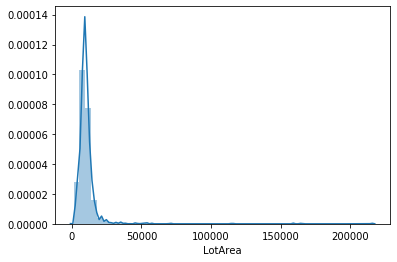

In [35]:
import seaborn as sns

sns.distplot(homedata_onehot['LotArea'])

        

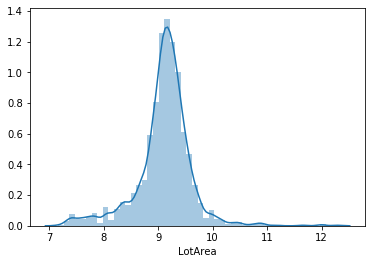

In [36]:
sns.distplot(np.log(homedata_onehot['LotArea']))